<a href="https://colab.research.google.com/github/jjgomez8a/IntroBioComp/blob/main/biophythonExamen1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 29.1 MB/s eta 0:00:00


In [4]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

In [5]:
# los archivos los descargue por medio de la consola del pc y los subi a la nube manualmente.
#Cargar las secuencias desde los archivos FASTA
seq_wt = SeqIO.read("Ecoli_phoA.fasta", "fasta")
seq_alpha = SeqIO.read("Ecoli_phoA_mutalpha.fasta", "fasta")
seq_beta = SeqIO.read("Ecoli_phoA_mutbeta.fasta", "fasta")

# Verificación: mostrar IDs y longitudes
print(f"WT: {seq_wt.id}, longitud: {len(seq_wt.seq)}")
print(f"MutAlpha: {seq_alpha.id}, longitud: {len(seq_alpha.seq)}")
print(f"MutBeta: {seq_beta.id}, longitud: {len(seq_beta.seq)}")

WT: NC_000913.3:401747-403162, longitud: 1416
MutAlpha: NC_000913.3:401747-403162_truncated, longitud: 1416
MutBeta: NC_000913.3:401747-403162_mutated, longitud: 1359


In [6]:
import pandas as pd

# Crear el DataFrame con la información de longitudes. En phython.
df = pd.DataFrame({
    "Cepa": ["WT", "MutAlpha", "MutBeta"],
    "Longitud_nt": [len(seq_wt.seq), len(seq_alpha.seq), len(seq_beta.seq)],
    "Longitud_aa": [len(seq_wt.seq.translate()),
                    len(seq_alpha.seq.translate()),
                    len(seq_beta.seq.translate())]
})

print(df)


       Cepa  Longitud_nt  Longitud_aa
0        WT         1416          472
1  MutAlpha         1416          472
2   MutBeta         1359          453


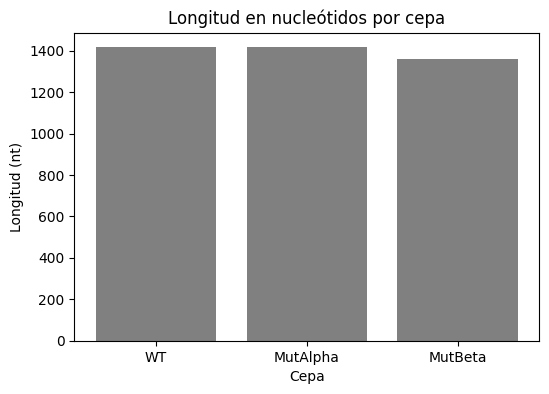

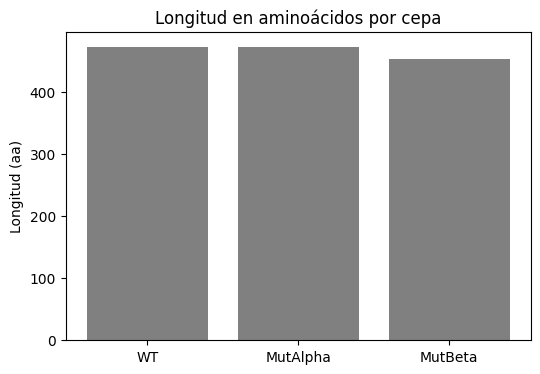

In [9]:
import matplotlib.pyplot as plt

# Gráfico de barras: Longitud en nucleótidos, phython.
plt.figure(figsize=(6,4))
plt.bar(df["Cepa"], df["Longitud_nt"], color="grey")
plt.xlabel("Cepa")
plt.ylabel("Longitud (nt)")
plt.title("Longitud en nucleótidos por cepa")
plt.show()

# Gráfico de barras: Longitud en aminoácidos, phython.
plt.figure(figsize=(6,4))
plt.bar(df["Cepa"], df["Longitud_aa"], color="grey")
plt.ylabel("Longitud (aa)")
plt.title("Longitud en aminoácidos por cepa")
plt.show()


In [12]:
# --- 5. Secuencias de Aminoácidos e interpretación de mutaciones ---

from Bio.Data import CodonTable

# Traducción con codones de parada marcados como '*'
def aa(seqrec):
    return str(seqrec.seq.translate(table=11, to_stop=False))

aa_wt    = aa(seq_wt)
aa_alpha = aa(seq_alpha)
aa_beta  = aa(seq_beta)

print("AA_WT   :", aa_wt)
print("AA_ALPHA:", aa_alpha)
print("AA_BETA :", aa_beta)

# Extra: ubicar posiciones de codones de parada
for name, aaseq in [("WT", aa_wt), ("ALPHA", aa_alpha), ("BETA", aa_beta)]:
    stop_positions = [i for i, aa in enumerate(aaseq, start=1) if aa == "*"]
    print(f"Stops en {name}: {stop_positions if stop_positions else 'ninguno'}")



AA_WT   : VKQSTIALALLPLLFTPVTKARTPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNIILLIGDGMGDSEITAARNYAEGAGGFFKGIDALPLTGQYTHYALNKKTGKPDYVTDSAASATAWSTGVKTYNGALGVDIHEKDHPTILEMAKAAGLATGNVSTAELQDATPAALVAHVTSRKCYGPSATSEKCPGNALEKGGKGSITEQLLNARADVTLGGGAKTFAETATAGEWQGKTLREQAQARGYQLVSDAASLNSVTEANQQKPLLGLFADGNMPVRWLGPKATYHGNIDKPAVTCTPNPQRNDSVPTLAQMTDKAIELLSKNEKGFFLQVEGASIDKQDHAANPCGQIGETVDLDEAVQRALEFAKKEGNTLVIVTADHAHASQIVAPDTKAPGLTQALNTKDGAVMVMSYGNSEEDSQEHTGSQLRIAAYGPHAANVVGLTDQTDLFYTMKAALGLK*
AA_ALPHA: VKQSTIALALLPLLFTPVTKARTPEMPVLENRA*QGDITAPGGARRLTGDQTAALRDSLSDKPAKNIILLIGDGMGDSEITAARNYAEGAGGFFKGIDALPLTGQYTHYALNKKTGKPDYVTDSAASATAWSTGVKTYNGALGVDIHEKDHPTILEMAKAAGLATGNVSTAELQDATPAALVAHVTSRKCYGPSATSEKCPGNALEKGGKGSITEQLLNARADVTLGGGAKTFAETATAGEWQGKTLREQAQARGYQLVSDAASLNSVTEANQQKPLLGLFADGNMPVRWLGPKATYHGNIDKPAVTCTPNPQRNDSVPTLAQMTDKAIELLSKNEKGFFLQVEGASIDKQDHAANPCGQIGETVDLDEAVQRALEFAKKEGNTLVIVTADHAHASQIVAPDTKAPGLTQALNTKDGAVMVMSYGNSEEDSQEHTGSQLRIAAYGPHAANVVGLTDQTDLFYTMKAALGLK*
AA_BETA : KARTPEMPVLENRAAQGDITAPGG

In [13]:
from Bio.Seq import Seq

def summarize(name, seqrec, table=11):
    nt = str(seqrec.seq)
    aa = str(seqrec.seq.translate(table=table, to_stop=False))
    stops = [i for i, x in enumerate(aa, 1) if x == "*"]
    codon_map = " ".join(f"{nt[i:i+3]}->{Seq(nt[i:i+3]).translate(table=table)}"
                         for i in range(0, len(nt) - 2, 3))
    print(f"[{name}]")
    print(f"NT: {nt}")
    print(f"AA: {aa}")
    print(f"Stops: {stops or 'ninguno'}")
    print(f"Codones: {codon_map}\n")

for name, rec in [("WT", seq_wt), ("ALPHA", seq_alpha), ("BETA", seq_beta)]:
    summarize(name, rec)


[WT]
NT: GTGAAACAAAGCACTATTGCACTGGCACTCTTACCGTTACTGTTTACCCCTGTGACAAAAGCCCGGACACCAGAAATGCCTGTTCTGGAAAACCGGGCTGCTCAGGGCGATATTACTGCACCCGGCGGTGCTCGCCGTTTAACGGGTGATCAGACTGCCGCTCTGCGTGATTCTCTTAGCGATAAACCTGCAAAAAATATTATTTTGCTGATTGGCGATGGGATGGGGGACTCGGAAATTACTGCCGCACGTAATTATGCCGAAGGTGCGGGCGGCTTTTTTAAAGGTATAGATGCCTTACCGCTTACCGGGCAATACACTCACTATGCGCTGAATAAAAAAACCGGCAAACCGGACTACGTCACCGACTCGGCTGCATCAGCAACCGCCTGGTCAACCGGTGTCAAAACCTATAACGGCGCGCTGGGCGTCGATATTCACGAAAAAGATCACCCAACGATTCTGGAAATGGCAAAAGCCGCAGGTCTGGCGACCGGTAACGTTTCTACCGCAGAGTTGCAGGATGCCACGCCCGCTGCGCTGGTGGCACATGTGACCTCGCGCAAATGCTACGGTCCGAGCGCGACCAGTGAAAAATGTCCGGGTAACGCTCTGGAAAAAGGCGGAAAAGGATCGATTACCGAACAGCTGCTTAACGCTCGTGCCGACGTTACGCTTGGCGGCGGCGCAAAAACCTTTGCTGAAACGGCAACCGCTGGTGAATGGCAGGGAAAAACGCTGCGTGAACAGGCACAGGCGCGTGGTTATCAGTTGGTGAGCGATGCTGCCTCACTGAATTCGGTGACGGAAGCGAATCAGCAAAAACCCCTGCTTGGCCTGTTTGCTGACGGCAATATGCCAGTGCGCTGGCTAGGACCGAAAGCAACGTACCATGGCAATATCGATAAGCCCGCAGTCACCTGTACGCCAAATCCGCAACGTAATGACAGTGTACCAACCCTGGCGCAGATGACCGACAAAGCCATTGAAT

Análisis

la secuencia WT corresponde a la proteína completa de 472 aminoácidos, mientras que la variante ALPHA presenta una mutación puntual que cambia un codón de alanina (GCT) a un codón de parada (TAA) alrededor de la posición 34, generando una proteína truncada de apenas 33 aa sin función. por otra parte, la variante BETA inicia la traducción alrededor de 19 aa más adelante que WT, produciendo una proteína de 453 aa que pierde el péptido señal y, aunque conserva el resto de la secuencia, probablemente altere su estructura 3d y por ende su función.